CNN With Custom Images

The dataset contains 2 folders - Infected - Uninfected

And a total of 27,558 images.

Please get this Dataset from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/

or

https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt 
import os
from matplotlib.image import imread
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Reading Image Data

In [2]:
Parasitized_directory =r"C:\Users\T\Documents\AIyapayzeka\Projects\Image Classification with CNN for Malaria Data\cell_images\Parasitized"
Uninfected_directory =r"C:\Users\T\Documents\AIyapayzeka\Projects\Image Classification with CNN for Malaria Data\cell_images\Uninfected"

In [3]:
parasitized_images = os.listdir(Parasitized_directory)
uninfected_images = os.listdir(Uninfected_directory)

In [4]:
len(parasitized_images)

13780

In [5]:
len(uninfected_images)

13780

# Visualization Cell Images

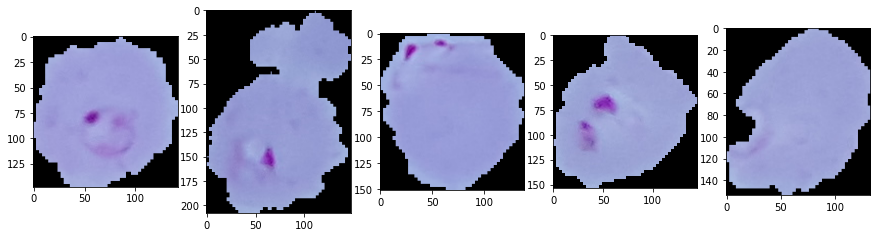

In [6]:
fig, ax = plt.subplots(1, 5, figsize=(15,5))
for i in range(5):
    img=cv2.imread(Parasitized_directory + '\\' + parasitized_images[i])
    ax[i].imshow(img)
plt.show()

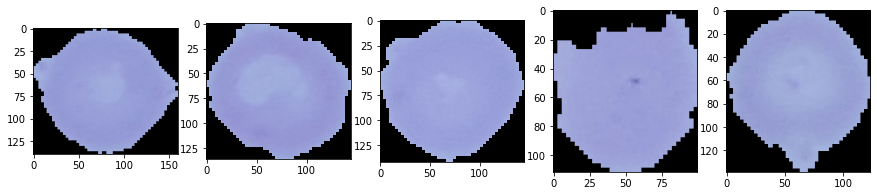

In [7]:
fig, ax = plt.subplots(1, 5, figsize=(15,5))
for i in range(5):
    img=cv2.imread(Uninfected_directory + '\\' + uninfected_images[i])
    ax[i].imshow(img)
plt.show()

In [8]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2) #split and reshape the cell images

In [ ]:
# prepare train and test data, label automatically 

In [9]:
trainDatagen = datagen.flow_from_directory(directory="C:\\Users\\T\Documents\\AIyapayzeka\\Projects\\Image Classification with CNN for Malaria Data\\cell_images",
                                           target_size=(150,150),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 22048 images belonging to 2 classes.


In [10]:
trainDatagen.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [11]:
valDatagen = datagen.flow_from_directory(directory="C:\\Users\\T\Documents\\AIyapayzeka\\Projects\\Image Classification with CNN for Malaria Data\\cell_images",
                                           target_size=(150,150),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 5510 images belonging to 2 classes.


In [12]:
valDatagen.class_indices

{'Parasitized': 0, 'Uninfected': 1}

# CNN Model

In [13]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))


model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
model.fit(trainDatagen,validation_data=valDatagen,epochs=10,verbose=1)

Epoch 1/10
1378/1378 [==============================] - 1247s 905ms/step - loss: 0.3178 - accuracy: 0.8972 - val_loss: 0.2112 - val_accuracy: 0.9314
Epoch 2/10
1378/1378 [==============================] - 1239s 899ms/step - loss: 0.2135 - accuracy: 0.9311 - val_loss: 0.2064 - val_accuracy: 0.9318
Epoch 3/10
1378/1378 [==============================] - 1242s 901ms/step - loss: 0.1954 - accuracy: 0.9388 - val_loss: 0.2032 - val_accuracy: 0.9321
Epoch 4/10
1378/1378 [==============================] - 1239s 899ms/step - loss: 0.1764 - accuracy: 0.9405 - val_loss: 0.1966 - val_accuracy: 0.9321
Epoch 5/10
1378/1378 [==============================] - 1237s 898ms/step - loss: 0.1567 - accuracy: 0.9437 - val_loss: 0.1924 - val_accuracy: 0.9312
Epoch 6/10
1378/1378 [==============================] - 1239s 899ms/step - loss: 0.1434 - accuracy: 0.9463 - val_loss: 0.1879 - val_accuracy: 0.9316
Epoch 7/10
1378/1378 [==============================] - 1315s 954ms/step - loss: 0.1302 - accuracy: 0.9492

In [22]:
#training accuracy: %96.42, validation accuracy: %92.76